In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.txt',sep='\n',header=2, low_memory=False, infer_datetime_format=True)
dataset.columns = ['A']

cnt = dataset['A'].count() - 1
    
for i in range(0, cnt-2, 3):
    dataset['A'][i] = pd.to_numeric(dataset['A'][i])
for i in range(1, cnt-1, 3):
    dataset['A'][i] = pd.to_numeric(dataset['A'][i])
    
pd.date_range(start ='2019-9-20 3:13:12', freq ='W', end = '2019-9-20 3:22:19')  
    
    
cpu = np.array(())
memory = np.array(())
time = np.array(())
    
for i in range(0, cnt-2, 3):                         # max = total rows - 2
    cpu  = np.append(cpu,dataset['A'][i])           
    
for j in range(1, cnt-1, 3):                         
    memory  = np.append(memory,dataset['A'][j])
        
for i in range(2, cnt, 3):
    time  = np.append(time,dataset['A'][i])
    
data = pd.DataFrame(data = memory, index = time,columns = ['Memory used'])
data['CPU used'] = cpu
data.index = pd.to_datetime(data.index)

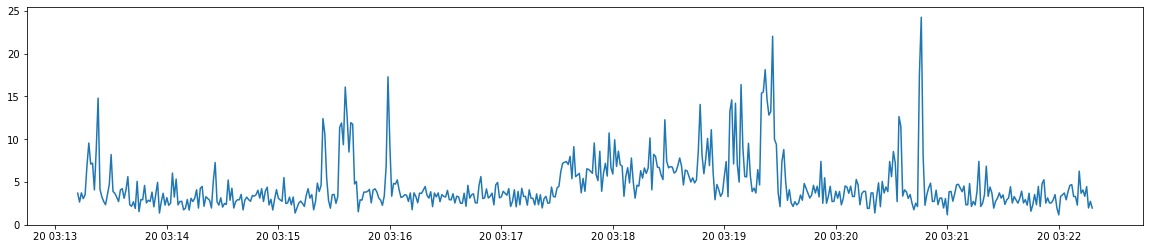

In [3]:
plt.figure(figsize=(20,4))
plt.plot(data['CPU used'])

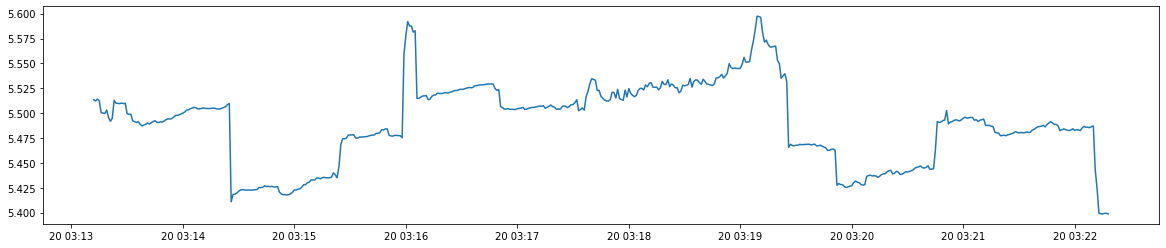

In [4]:
plt.figure(figsize=(20,4))
plt.plot(data['Memory used'])

In [5]:
train = data[:430]
test = data[431:]

In [6]:
train_cpu = train.iloc[:,1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled_cpu = sc.fit_transform(train_cpu)

In [8]:
X_train_cpu = []
y_train_cpu = []
for i in range(40, 420):
    X_train_cpu.append(training_scaled_cpu[i-40:i, 0])
    y_train_cpu.append(training_scaled_cpu[i, 0])
X_train_cpu, y_train_cpu = np.array(X_train_cpu), np.array(y_train_cpu)

In [9]:
X_train_cpu = np.reshape(X_train_cpu, (X_train_cpu.shape[0],X_train_cpu.shape[1],1))

In [10]:
dataset_total = pd.concat((train['CPU used'],test['CPU used']),axis=0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
X_test_cpu = []
for i in range(40,152):
    X_test_cpu.append(inputs[i-40:i,0])
    
X_test_cpu = np.array(X_test_cpu)
X_test_cpu = np.reshape(X_test_cpu, (X_test_cpu.shape[0], X_test_cpu.shape[1],1))

In [11]:
real_cpu = test.iloc[:, 1:2].values
real_cpu = real_cpu[:112]

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train_cpu.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
checkpointer = ModelCheckpoint(filepath='weights_cpu.hdf5', verbose=1)
train_history = regressor.fit( X_train_cpu, y_train_cpu, epochs=100, batch_size=32, callbacks = [checkpointer], verbose=1)

Epoch 1/100
380/380 [==============================] - 7s 19ms/step - loss: 0.0259

Epoch 00001: saving model to weights_cpu.hdf5
Epoch 2/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0208

Epoch 00002: saving model to weights_cpu.hdf5
Epoch 3/100
380/380 [==============================] - 4s 9ms/step - loss: 0.0199

Epoch 00003: saving model to weights_cpu.hdf5
Epoch 4/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0206

Epoch 00004: saving model to weights_cpu.hdf5
Epoch 5/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0205

Epoch 00005: saving model to weights_cpu.hdf5
Epoch 6/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0185

Epoch 00006: saving model to weights_cpu.hdf5
Epoch 7/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0197

Epoch 00007: saving model to weights_cpu.hdf5
Epoch 8/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0215

Epoch 00008: 

380/380 [==============================] - 3s 9ms/step - loss: 0.0129

Epoch 00064: saving model to weights_cpu.hdf5
Epoch 65/100
380/380 [==============================] - 4s 10ms/step - loss: 0.0138

Epoch 00065: saving model to weights_cpu.hdf5
Epoch 66/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0124

Epoch 00066: saving model to weights_cpu.hdf5
Epoch 67/100
380/380 [==============================] - 4s 9ms/step - loss: 0.0116

Epoch 00067: saving model to weights_cpu.hdf5
Epoch 68/100
380/380 [==============================] - 4s 10ms/step - loss: 0.0127

Epoch 00068: saving model to weights_cpu.hdf5
Epoch 69/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0130

Epoch 00069: saving model to weights_cpu.hdf5
Epoch 70/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0127

Epoch 00070: saving model to weights_cpu.hdf5
Epoch 71/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0121

Epoch 00071: savi

In [15]:
regressor.load_weights('weights_cpu.hdf5')

In [16]:
predicted_cpu_usage = regressor.predict(X_test_cpu)
predicted_cpu_usage = sc.inverse_transform(predicted_cpu_usage)

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(real_cpu, predicted_cpu_usage))
print('MSE:', metrics.mean_squared_error(real_cpu, predicted_cpu_usage))
print('RMSE:', np.sqrt(metrics.mean_squared_error(real_cpu, predicted_cpu_usage)))
print(metrics.r2_score(real_cpu, predicted_cpu_usage))

MAE: 2.7940991780315128
MSE: 20.155245221972752
RMSE: 4.489459346288008
-1.3677648954384711


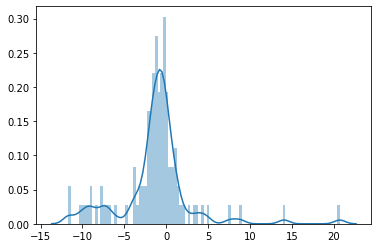

In [18]:
import seaborn as sns
sns.distplot(real_cpu-predicted_cpu_usage, bins=100, kde=True)

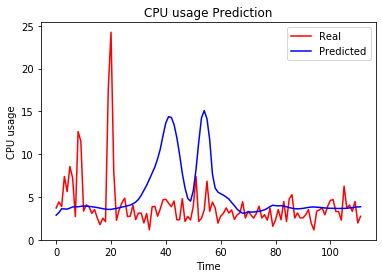

In [19]:
plt.plot(real_cpu, color = 'red', label = 'Real')
plt.plot(predicted_cpu_usage,color='blue', label = 'Predicted')
plt.title('CPU usage Prediction')
plt.xlabel('Time')
plt.ylabel('CPU usage')
plt.legend()
plt.show()

# Memory

In [20]:
train_memory = train.iloc[:,0:1].values

In [21]:
train_memory = sc.fit_transform(train_memory)

In [22]:
X_train_memory = []
y_train_memory = []
for i in range(40,420):
    X_train_memory.append(train_memory[i-40:i, 0])
    y_train_memory.append(train_memory[i,0])
X_train_memory, y_train_memory = np.array(X_train_memory), np.array(y_train_memory)

In [23]:
X_train_memory = np.reshape(X_train_memory, (X_train_memory.shape[0],X_train_memory.shape[1],1))

In [24]:
model = Sequential()

In [25]:
model.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train_memory.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
memory_checkpoint = ModelCheckpoint(filepath= "weights_memory.hdf5", verbose=1)

In [27]:
train_history = regressor.fit( X_train_memory, y_train_memory, epochs=100, batch_size=32, callbacks = [memory_checkpoint], verbose=1)

Epoch 1/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0820

Epoch 00001: saving model to weights_memory.hdf5
Epoch 2/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0299

Epoch 00002: saving model to weights_memory.hdf5
Epoch 3/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0233

Epoch 00003: saving model to weights_memory.hdf5
Epoch 4/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0208

Epoch 00004: saving model to weights_memory.hdf5
Epoch 5/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0189

Epoch 00005: saving model to weights_memory.hdf5
Epoch 6/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0187

Epoch 00006: saving model to weights_memory.hdf5
Epoch 7/100
380/380 [==============================] - 3s 8ms/step - loss: 0.0155

Epoch 00007: saving model to weights_memory.hdf5
Epoch 8/100
380/380 [==============================] - 3s 8ms/step - loss: 0

380/380 [==============================] - 3s 9ms/step - loss: 0.0068

Epoch 00063: saving model to weights_memory.hdf5
Epoch 64/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0060

Epoch 00064: saving model to weights_memory.hdf5
Epoch 65/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0051

Epoch 00065: saving model to weights_memory.hdf5
Epoch 66/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0049

Epoch 00066: saving model to weights_memory.hdf5
Epoch 67/100
380/380 [==============================] - 4s 9ms/step - loss: 0.0053

Epoch 00067: saving model to weights_memory.hdf5
Epoch 68/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0046

Epoch 00068: saving model to weights_memory.hdf5
Epoch 69/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0056

Epoch 00069: saving model to weights_memory.hdf5
Epoch 70/100
380/380 [==============================] - 3s 9ms/step - loss: 0.0049

In [28]:
real_memory = test.iloc[:,0:1].values
real_memory = real_memory[:112]

In [29]:
dataset_total = pd.concat((train['Memory used'],test['Memory used']),axis=0)
inputs = dataset_total[len(dataset_total) - len(test) - 40:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
X_test_memory = []
for i in range(40,152):
    X_test_memory.append(inputs[i-40:i,0])

In [30]:
model.load_weights('weights_memory.hdf5')

In [31]:
X_test_memory = np.array(X_test_memory)
X_test_memory = np.reshape(X_test_memory, (X_test_memory.shape[0], X_test_memory.shape[1],1))

In [32]:
predicted_memory_usage = model.predict(X_test_memory)
predicted_memory_usage = sc.inverse_transform(predicted_memory_usage)

In [33]:
print('MAE:', metrics.mean_absolute_error(real_memory, predicted_memory_usage))
print('MSE:', metrics.mean_squared_error(real_memory, predicted_memory_usage))
print('RMSE:', np.sqrt(metrics.mean_squared_error(real_memory, predicted_memory_usage)))
print(metrics.r2_score(real_memory, predicted_memory_usage))

MAE: 0.006063331229346135
MSE: 0.00014622367022734396
RMSE: 0.012092297971326375
0.7515379040034391


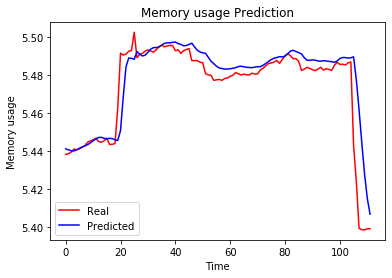

In [34]:
plt.plot(real_memory, color = 'red', label = 'Real')
plt.plot(predicted_memory_usage,color='blue', label = 'Predicted')
plt.title('Memory usage Prediction')
plt.xlabel('Time')
plt.ylabel('Memory usage')
plt.legend()
plt.show()

This was a prediction based on Recurrent Neural Networks. 
ARIMA models are only applicable to data that has trend, so it performs poorly on volatile data.
This RNN with LSTM blocks were able to perform very well on Memory usage data and fine on CPU usage data, both of which are fairly volatile.